In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [2]:
btc = pdr.get_data_yahoo("BTC-USD")
day = np.arange(1,len(btc)+1)
btc["day"] = day
btc.drop(columns=["Adj Close","Volume"],inplace=True)
btc = btc[['day','Open','High',"Low",'Close']]
btc.head()

,day,Open,High,Low,Close
Date,,,,,
2017-02-14,1,991.734985,1011.510010,986.471008,1004.549988
2017-02-15,2,1006.210022,1008.840027,1001.580017,1007.479980
2017-02-16,3,1007.650024,1033.369995,1007.650024,1027.439941
2017-02-17,4,1026.119995,1053.170044,1025.640015,1046.209961
2017-02-18,5,1049.209961,1061.099976,1046.959961,1054.420044


In [3]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2017-02-14 to 2022-02-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1826 non-null   int32  
 1   Open    1826 non-null   float64
 2   High    1826 non-null   float64
 3   Low     1826 non-null   float64
 4   Close   1826 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 78.5 KB


In [4]:
btc['5-day'] = btc["Close"].rolling(5).mean().shift()
btc['14-day'] = btc["Close"].rolling(14).mean().shift()
btc[12:]

,day,Open,High,Low,Close,5-day,14-day
Date,,,,,,,
2017-02-26,13,1144.270020,1167.469971,1130.199951,1165.199951,1143.395996,NaN
2017-02-27,14,1163.780029,1181.979980,1163.380005,1179.969971,1153.375977,NaN
2017-02-28,15,1180.719971,1193.250000,1171.819946,1179.969971,1165.881982,1095.007128
2017-03-01,16,1180.040039,1222.500000,1179.689941,1222.500000,1168.531982,1107.537127
2017-03-02,17,1224.680054,1262.130005,1215.619995,1251.010010,1178.295972,1122.895700
...,...,...,...,...,...,...,...
2022-02-09,1822,44096.703125,44727.800781,43232.968750,44338.796875,42662.640625,39462.689732
2022-02-10,1823,44347.800781,45661.171875,43402.808594,43565.113281,43230.225000,39997.452288
2022-02-11,1824,43571.128906,43810.832031,42114.539062,42407.937500,43655.014844,40456.515067


In [5]:
btc['signal'] = np.where(btc['5-day'] > btc['14-day'] , 1 , 0)
btc['signal'] = np.where(btc['5-day'] < btc['14-day'] , -1 , btc['signal'])
btc.dropna(inplace=True)
btc.head(150)

,day,Open,High,Low,Close,5-day,14-day,signal
Date,,,,,,,,
2017-02-28,15,1180.719971,1193.250000,1171.819946,1179.969971,1165.881982,1095.007128,1
2017-03-01,16,1180.040039,1222.500000,1179.689941,1222.500000,1168.531982,1107.537127,1
2017-03-02,17,1224.680054,1262.130005,1215.619995,1251.010010,1178.295972,1122.895700,1
2017-03-03,18,1250.709961,1280.310059,1250.709961,1274.989990,1199.729980,1138.864990,1
2017-03-04,19,1277.430054,1279.400024,1230.510010,1255.150024,1221.687988,1155.206421,1
...,...,...,...,...,...,...,...,...
2017-07-23,160,2808.100098,2832.179932,2653.939941,2730.399902,2577.558008,2375.982143,1
2017-07-24,161,2732.699951,2777.260010,2699.189941,2754.860107,2659.862012,2391.122140,1
2017-07-25,162,2757.500000,2768.080078,2480.959961,2576.479980,2756.148047,2418.429286,1


In [6]:
# instantanious return #typical buy and hold # just daily profit or loss you would have
btc['return'] = np.log(btc['Close']).diff()
# system returns depends on whether we long or short
btc['system_return'] = btc['signal'] * btc['return']
# values show up when we change directions on a trade
# when we go short from being long, the diff is gonna be -2
# when we go long from being short, the diff is gonna be 2
# if its -2, you go short, if its 2 you long
btc['entry'] = btc.signal.diff()
btc.head(14)

,day,Open,High,Low,Close,5-day,14-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2017-02-28,15,1180.719971,1193.250000,1171.819946,1179.969971,1165.881982,1095.007128,1,NaN,NaN,NaN
2017-03-01,16,1180.040039,1222.500000,1179.689941,1222.500000,1168.531982,1107.537127,1,0.035409,0.035409,0.0
2017-03-02,17,1224.680054,1262.130005,1215.619995,1251.010010,1178.295972,1122.895700,1,0.023053,0.023053,0.0
2017-03-03,18,1250.709961,1280.310059,1250.709961,1274.989990,1199.729980,1138.864990,1,0.018987,0.018987,0.0
2017-03-04,19,1277.430054,1279.400024,1230.510010,1255.150024,1221.687988,1155.206421,1,-0.015683,-0.015683,0.0
2017-03-05,20,1254.290039,1267.290039,1238.060059,1267.119995,1236.723999,1169.544277,1,0.009491,0.009491,0.0
2017-03-06,21,1267.469971,1276.000000,1264.599976,1272.829956,1254.154004,1185.204991,1,0.004496,0.004496,0.0
2017-03-07,22,1273.209961,1275.550049,1204.800049,1223.540039,1264.219995,1198.979989,1,-0.039494,-0.039494,0.0
2017-03-08,23,1223.229980,1232.160034,1148.079956,1150.000000,1258.726001,1206.711417,1,-0.061986,-0.061986,0.0


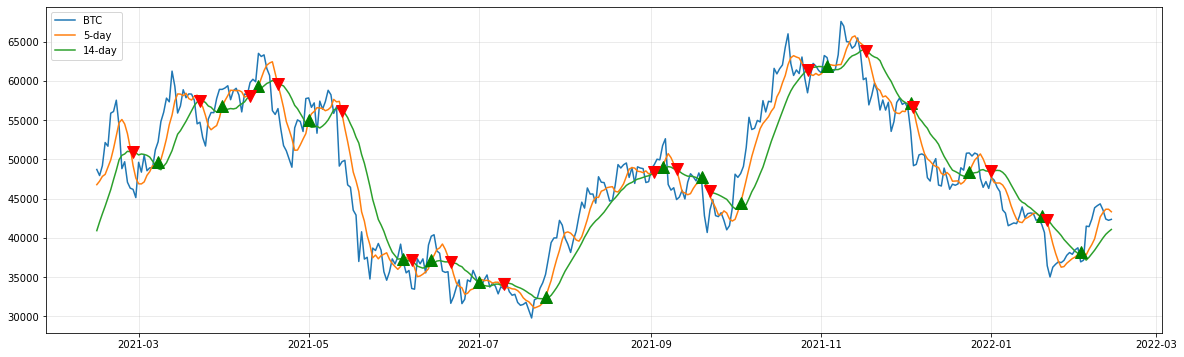

In [7]:
plt.rcParams['figure.figsize'] = 20, 6
plt.grid(True, alpha = .3)
plt.plot(btc.iloc[-365:]['Close'], label = 'BTC')
plt.plot(btc.iloc[-365:]['5-day'], label = '5-day')
plt.plot(btc.iloc[-365:]['14-day'], label = '14-day')
plt.plot(btc[-365:].loc[btc.entry == 2].index, btc[-365:]['5-day'][btc.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(btc[-365:].loc[btc.entry == -2].index, btc[-365:]['14-day'][btc.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

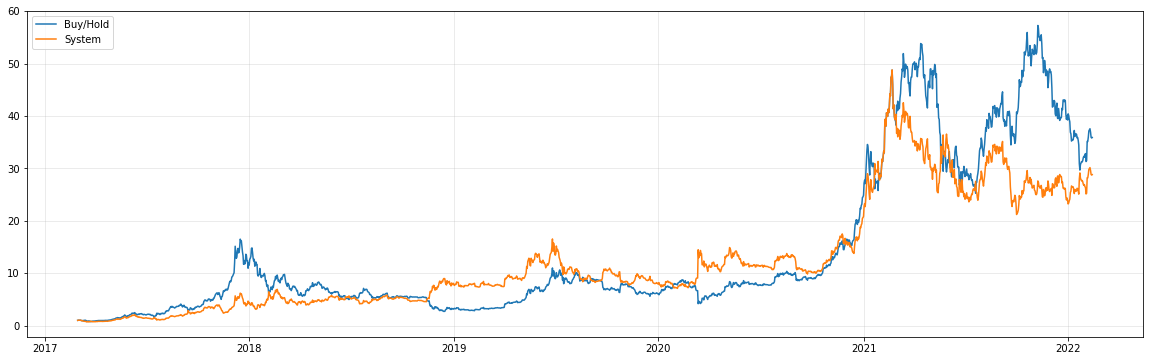

In [8]:
plt.plot(np.exp(btc['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(btc['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [9]:
np.exp(btc['return']).cumprod()[-1] -1

34.90359510357341

In [10]:
np.exp(btc['system_return']).cumprod()[-1] -1


27.82091682166396